In [1]:
# to get started, we will import these libraries
import urllib.request, json 
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from sodapy import Socrata

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# next we will connect to the data portal to load in vacant parcel data from LA County Assessor
client = Socrata("data.lacounty.gov", None)

# The website says this dataset has 176K rows, we are going to try to call in all of them using 180K in case more have been added. However, we are also going to limit our data to Los Angeles incorporated
results = client.get("vcaw-zeg9", limit=180000, where="taxratearea_city=='LOS ANGELES'")

# We'll need to convert to pandas DataFrame
vacdf = pd.DataFrame.from_records(results)

vacdf.sample(5)

,usecodedescchar1,roll_homeownersexemp,situsunit,recordingdate,effectiveyearbuilt,istaxableparcel,roll_totlandimp,roll_perspropexemp,parcelboundarydescription,roll_landbaseyear,...,location_1,bathrooms,sqftmain,situsdirection,roll_realestateexemp,center_lat,situszip,yearbuilt,propertylocation,situszip5
21098,Miscellaneous,0,,19580519,0,N,0,0,ALBERT H BEACH'S COTTAGE TERRACE (EX OF STS) L...,1975,...,"{'latitude': '34.09953181', 'needs_recoding': ...",0,0,,0,34.09953181,,0,NaN,NaN
16461,Commercial,0,,20060202,0,N,0,0,MR 10-62 EX OF ST LOT 9 BLK A,2000,...,"{'latitude': '34.06373723', 'needs_recoding': ...",0,0,,0,34.06373723,90026-5733,0,1644 BEVERLY BLVD LOS ANGELES CA 90026,90026
29587,Residential,0,,20020124,0,Y,9827,0,TRACT NO 9083 LOT COM AT MOST N COR OF LOT 192...,2002,...,"{'latitude': '33.92988862', 'needs_recoding': ...",0,0,,0,33.92988862,,0,NaN,NaN
2343,Residential,0,,19920505,0,Y,257481,0,"*LAND DESC IN DOC 0003223, 76-2-20 *TR=18174*P...",1992,...,"{'latitude': '34.13943452', 'needs_recoding': ...",0,0,,0,34.13943452,91403-4520,0,3723 LOADSTONE DR LOS ANGELES CA 91403,91403
12941,Residential,0,,20131231,0,Y,994480,0,TRACT NO 14885 LOT COM AT MOST N COR OF LOT 8 ...,2014,...,"{'latitude': '34.11326995', 'needs_recoding': ...",0,0,,0,34.11326995,,0,NaN,NaN


In [121]:
# importing our community boundaries dataset by referencing API from data source

comdf = pd.read_json( r'https://data.lacounty.gov/resource/frhs-h972.json' )

comdf.sample(5)

,objectid,city_type,lcity,label,source,shape_starea,shape_stlength,the_geom,community
123,68,City,Los Angeles,Los Angeles - Chinatown,LA City,1.118736e+07,14754.461111,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Chinatown
188,145,City,Los Angeles,Los Angeles - South Carthay,LA City,1.479925e+07,18153.185490,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",South Carthay
291,43,City,Lancaster,City of Lancaster,BOS,2.635030e+09,678436.664903,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",NaN
222,128,City,Los Angeles,Los Angeles - Palisades Highlands,LA City,5.152264e+08,131317.838806,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Palisades Highlands
340,177,City,Los Angeles,Los Angeles - Westchester,LA City,3.593835e+08,114680.771063,"{'type': 'MultiPolygon', 'coordinates': [[[[-1...",Westchester


In [5]:
vacdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33091 entries, 0 to 33090
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   usecodedescchar1           33080 non-null  object
 1   roll_homeownersexemp       33091 non-null  object
 2   situsunit                  33091 non-null  object
 3   recordingdate              33091 non-null  object
 4   effectiveyearbuilt         33091 non-null  object
 5   istaxableparcel            33091 non-null  object
 6   roll_totlandimp            33091 non-null  object
 7   roll_perspropexemp         33091 non-null  object
 8   parcelboundarydescription  33091 non-null  object
 9   roll_landbaseyear          33091 non-null  object
 10  situscity                  33091 non-null  object
 11  roll_impbaseyear           33091 non-null  object
 12  usetype                    33080 non-null  object
 13  cluster                    33091 non-null  object
 14  adminr

In [122]:
# conduct a spatial join (assign each vacant lot to the neighborhood it is in)
vac_by_com = pd.join(comgdf, vacgdf) 

vac_by_com

AttributeError: module 'pandas' has no attribute 'join'

In [7]:
vacdf = vacdf.fillna("N/A")

In [8]:
vacdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33091 entries, 0 to 33090
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   usecodedescchar1           33091 non-null  object
 1   roll_homeownersexemp       33091 non-null  object
 2   situsunit                  33091 non-null  object
 3   recordingdate              33091 non-null  object
 4   effectiveyearbuilt         33091 non-null  object
 5   istaxableparcel            33091 non-null  object
 6   roll_totlandimp            33091 non-null  object
 7   roll_perspropexemp         33091 non-null  object
 8   parcelboundarydescription  33091 non-null  object
 9   roll_landbaseyear          33091 non-null  object
 10  situscity                  33091 non-null  object
 11  roll_impbaseyear           33091 non-null  object
 12  usetype                    33091 non-null  object
 13  cluster                    33091 non-null  object
 14  adminr

In [25]:
vacdf.groupby(['usecodedescchar1'])['usecodedescchar1'].count()

usecodedescchar1
Commercial        2704
Dry Farm           118
Industrial        2843
Institutional       66
Miscellaneous      926
N/A                 11
Recreational        34
Residential      26389
Name: usecodedescchar1, dtype: int64

In [ ]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# plot a Stacked Bar Chart using matplotlib
vacdf.plot(
x = 'Name',
kind = 'barh',
stacked = True,
title = 'Percentage Stacked Bar Graph',
mark_right = True)

df_total = vacdf["Studied"] + vacdf["Slept"] + vacdf["Other"]
df_rel = vacdf[vacdf.columns[1:]].div(vacdf_total, 0) * 100

for n in df_rel:
	for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n],
										df[n], df_rel[n])):
		plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%',
				va = 'center', ha = 'center', rotation = 20, fontsize = 8)


In [73]:
vacpie = vacdf.groupby(['usecodedescchar1'])['usecodedescchar1'].count()

In [74]:
vacpie

usecodedescchar1
Commercial        2704
Dry Farm           118
Industrial        2843
Institutional       66
Miscellaneous      926
N/A                 11
Recreational        34
Residential      26389
Name: usecodedescchar1, dtype: int64

In [79]:
labels = vacpie.keys()

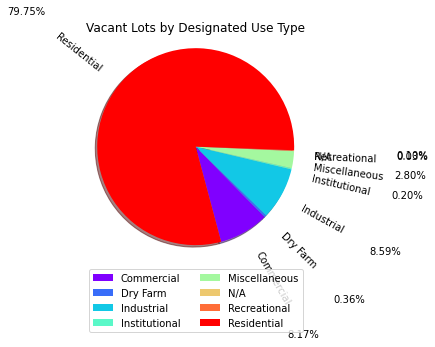

NameError: name 'group_lower_ranking_values' is not defined

In [119]:
cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

y = np.array(vacpie)

plt.pie(y, shadow=True, labels=labels, autopct='%1.2f%%', rotatelabels=180, startangle=285, pctdistance=2.2, 
        labeldistance=1.2, colors=colors)

plt.title('Vacant Lots by Designated Use Type')

plt.legend(labels=labels, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2)

plt.axis('equal')

plt.show() 

vacpieplot = group_lower_ranking_values(labels)

In [114]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [107]:
plt.magma

<function matplotlib.pyplot.magma()>

/tmp/ipykernel_1319/4257674993.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y = np.array(vacpie)


ValueError: could not convert string to float: 'usecodedescchar1'

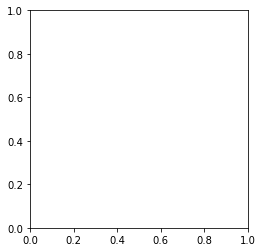

In [48]:
def vacpiechart(column = 'usecodedescchar1'):
    # aggregate column object counts
    
   vacpie = vacdf.groupby([column])[column].count()

    # plot pie
    
y = np.array(vacpie)

plt.pie(y, colors='inferno', startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1), autopct='%1.2f%%')

plt.title('Vacant Lots by Designated Use Type')

plt.axis('equal')

plt.show() 

In [43]:
# for each column in the dataframe
for vacpie in vacdf.iteritems():
    vacpiechart(column)

NameError: name 'column' is not defined

In [42]:
print
  

<function print>